In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [54]:
def generate_gaussian_mixture(N = 10000, mi0=1, sigma0=1, m1=5, sigma1=2):
  X = []
  for i in range(N):
    if np.random.binomial(1, 0.3) == 1:
      X.append(np.random.normal(mi0, sigma0))
    else:
      X.append(np.random.normal(mi1, sigma1))
  return np.array(X)

In [8]:
def E_step(pi, mi0, mi1, sigma0, sigma1, y):
  gamma = pi * norm(mi1, sigma1**(1/2)).pdf(y) / ((1-pi)*norm(mi0, sigma0**(1/2)).pdf(y) + pi * norm(mi1, sigma1**(1/2)).pdf(y))
  return gamma

In [133]:
def M_step(y, gamma, mi0, mi1):
  new_mi0 = np.sum((1-gamma) * y) / np.sum(1-gamma)
  new_mi1 = np.sum((gamma) * y) / np.sum(gamma)

  new_sigma0 = np.sum((1-gamma) * ((y - mi0)**2)) / np.sum(1-gamma)
  new_sigma1 = np.sum((gamma) * ((y - mi1)**2)) / np.sum(gamma)

  new_pi = np.mean(gamma)

  return new_mi0, new_mi1, new_sigma0, new_sigma1, new_pi

In [147]:
y = generate_gaussian_mixture(N=1000)
mi0, mi1, sigma0, sigma1 = np.random.uniform(0, 1, 4)
pi = 0.5

for i in range(500):
  if i < 2:
    pi = 0.5
  gamma = E_step(pi, mi0, mi1, sigma0, sigma1, y)
  mi0, mi1, sigma0, sigma1, pi = M_step(y, gamma, mi0, mi1)

In [148]:
print(f"mi0: {mi0}, sigma0: {sigma0**(1/2)}, mi1: {mi1}, sigma1: {sigma1**(1/2)}, pi: {pi}")

mi0: 0.9193662805636127, sigma0: 0.9602688379900285, mi1: 5.388989518546199, sigma1: 2.1534138115511405, pi: 0.7576377332859465


In [149]:
X_theoretical = np.arange(-3, 12, 15/10000)
X_theoretical = np.sort(X_theoretical)
theoretical = 0.3 * norm(1, 1).pdf(X_theoretical) + 0.7 * norm(5, 2).pdf(X_theoretical)

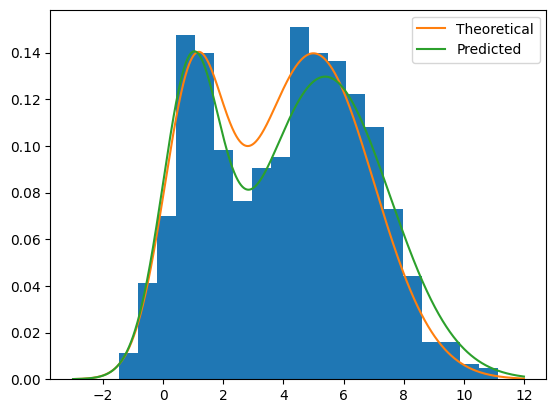

In [150]:
if mi0 > mi1:
  mi0, mi1 = mi1, mi0
  sigma0, sigma1 = sigma1, sigma0

plt.hist(generate_gaussian_mixture(N = 1000), bins=20, density=True)
plt.plot(X_theoretical, theoretical)
plt.plot(X_theoretical, 0.3 * norm(mi0, sigma0**(1/2)).pdf(X_theoretical) + 0.7 * norm(mi1, sigma1**(1/2)).pdf(X_theoretical))
plt.legend(["Theoretical", "Predicted"])
plt.show()